In [4]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


In [5]:
data = pd.read_csv('spambase.data').as_matrix()

C:\Users\Agniesia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [6]:
np.random.shuffle(data)

In [7]:
#48 continuous real [0,100] attributes of type word_freq_WORD 
X = data[:,:57]
#1 nominal {0,1} class attribute of type spam
#| = denotes whether the e-mail was considered spam (1) or not (0), 
#| i.e. unsolicited commercial e-mail.  
Y = data[:,-1]

In [31]:
#datasplit for training and test
X_train = X[:-1380,]
Y_train = Y[:-1380,]
X_test = X[-1380:,]
Y_test = Y[-1380:,]


In [1]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=58, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
Y_pred = model.fit(X_train, Y_train).predict(X_test)

NameError: name 'RandomForestClassifier' is not defined

In [91]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

In [92]:
f1_score(Y_test,Y_pred)

0.9353049907578558

In [93]:
roc_auc_score(Y_test, Y_pred)


0.9426758956482284

In [95]:
balanced_accuracy_score(Y_test, Y_pred)

0.9426758956482284

In [96]:
def matrix(Y_true, Y_pred): return confusion_matrix(Y_true, Y_pred)

In [97]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_pred)

In [98]:
average_precision

0.9125177767617858

Text(0.5,1,'2-class Precision-Recall curve: AP=0.91')

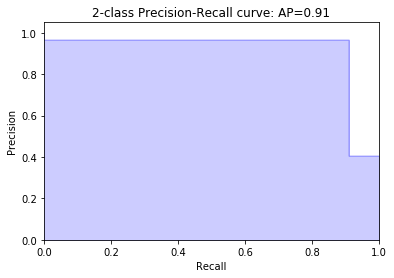

In [87]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(Y_test, Y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(Y_test,Y_pred)

0.95

In [78]:
recall_score(Y_test,Y_pred)

0.9102333931777379